## 基于 BERT 的情感分析(文本分类)

   2018年的10月11日，Google发布一篇论文《Pre-training of Deep Bidirectional Transformers for Language Understanding》，成功在 11 项 NLP 任务中取得 SOTA(最优) 结果，赢得自然语言处理学界的一片赞誉之声。

从此各种**类BERT模型**如雨后春笋般不断破土而出，创造了 NLP 领域一项又一项新的记录，本次我将带领大家在 18 多万条数据集上**微调BERT**实现情感分析(文本分类)。

### 基本概念理解

是什么导致了 BERT 的诞生?

BERT 有哪些优势?

#### 简便的编码方式: One-Hot 编码

我们都知道，大家说的话都是**人类语言**，而计算机本质只认识**数字信息**，那计算机理解人类语言信息又是必须过程，那么我们该如何设计数字编码表示语言信息呢?

此时，最初的编码方式诞生了，即**One-Hot编码**，又称**独热编码方式**。假设现在有四个词 ['钢琴 ', '绘画', '舞蹈 ', '篮球'] ，则编码方式如下:

钢琴 →  [1, 0, 0, 0]

绘画 →  [0, 1, 0, 0]

舞蹈 →  [0, 0, 1, 0]

篮球 →  [0, 0, 0, 1]

每个词在向量中都会有一个 1 与之对应，代表该词元的编码信息。最初很多文本信息都是这种编码方式，但是久而久之，这种编码方式的两种**缺陷**便显露出来:

1、可能产生**维度爆炸**的问题，即当词元的个数超级多的时候，每个词元的向量长度均为词元个数 n ,导致计算机无法存储，运算速度极慢。

2、无法有效表示**词元的相似关系**，每个词元只能独立表示。

#### 突破: Word2Vec编码方式

为了改进 One-Hot 编码的缺陷，一种新的编码方式应运而生。2013年，Google团队发布了论文《Efficient Estimation of Word Representations inVector Space》，Word2Vec编码方式由此诞生，很大程度上推动了 NLP 领域的发展。其编码方式有以下两种:

1、Skip-Gram模型，即**跳元模型**。其原理是**根据中心词预测上下文词**。

2、CBOW模型，即**连续词袋模型**。其原理是**根据上下文词预测中心词**。


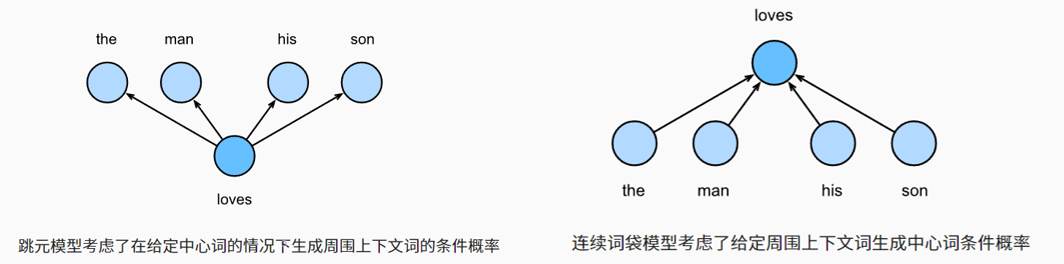

通过计算 **中心词与上下文词的余弦相似度**，来确定不同词元直接的关系。最终将所有词元都转化为长度为 embedding_dim(50~300)的向量。

这样不仅能够很大程度上缩减词元的存储空间，又能获得词元与词元之间的相似度。但是这种方法也有一些**缺陷**:

1、由于词和向量是一对一的关系，所以**多义词**的问题无法解决。

2、Word2vec 是一种静态的方式，虽然通用性强，但是**无法针对特定任务做动态优化**。

关于Word2Vec的原理与代码实现，请看这几部分内容[Word2Vec的详情原理](https://zh-v2.d2l.ai/chapter_natural-language-processing-pretraining/word2vec.html)。

#### 新的开始: Attention 与 Transformer 模型

2017年6月，Google团队再次发布论文 **《Attention Is All You Need》** 关于注意力机制的 **Transformer**模型。

该论文主张使用注意力的机制，完全抛弃CNN，RNN等网络模型结构。起初主要应用在自然语言处理NLP中，后面也逐渐应用到了计算机视觉中。

仅仅通过 **注意力机制（self-attention）** 和 **前馈神经网络（Feed Forward Neural Network）**，不需要使用序列对齐的循环架构就实现了较好的效果。

模型结构如下图:

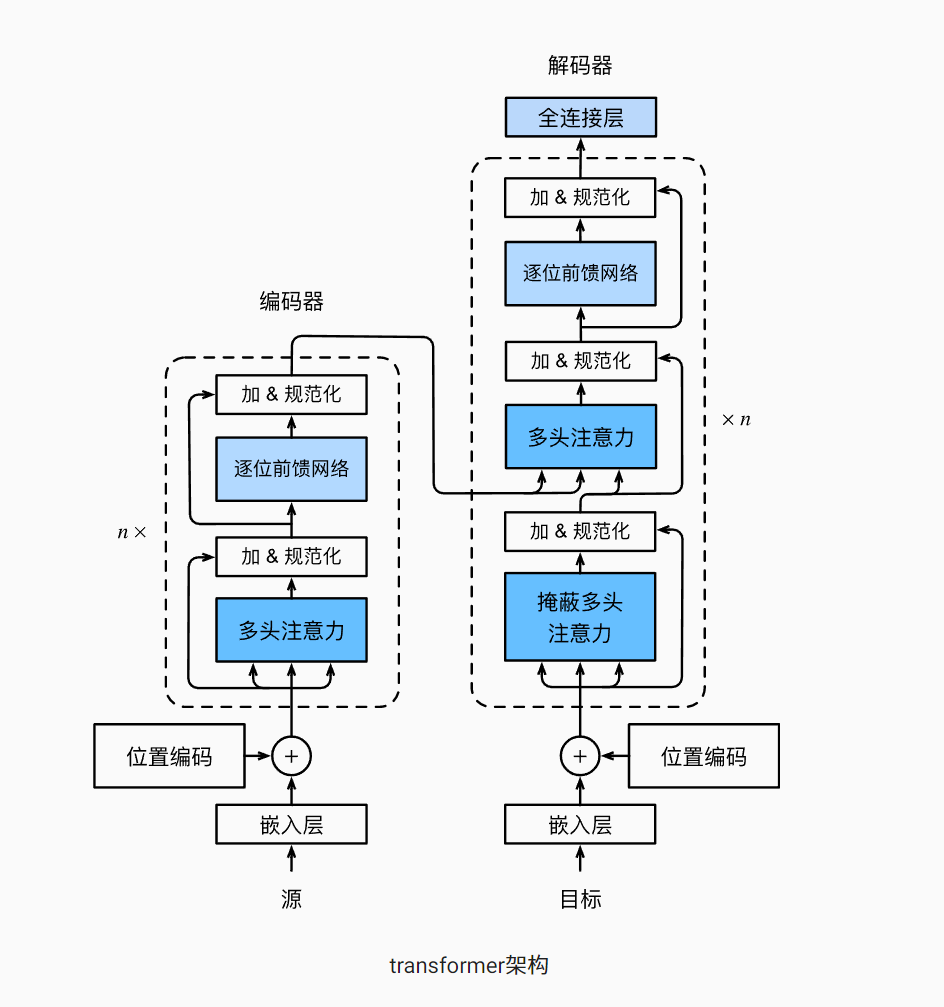

其存在两方面优点:

1、摒弃了RNN的网络结构模式，其能够很好的**并行运算**。

2、其注意力机制能够帮助**当前词**获取较好的**上下文信息**。

由于Transformer部分的原理内容较多，所以暂时跳过，有兴趣的朋友可阅读[此篇文章](https://zh-v2.d2l.ai/chapter_attention-mechanisms/transformer.html)。

#### 四方来降: 超一流预处理模型 BERT 诞生

Bert基于Transformer编码器块架构进行设计，同时采用了两种方法来提升 NLP 处理水平:

1、**MLM(Maked Language Model)掩蔽语言模型**，Bert通过MLM方法来随机掩蔽句子中的一个词元，设计模型根据上下文信息去预测该词元。通过此种方法，使模型能够很好地解决**多义词匹配**和**上下文语义理解**问题。

2、**NSP(Next Sentence Prediction)下一句预测**，随机选取多组 两个连接或两个不连接的句子，设置它们是否连续(为上下文)的标记，从而进行训练，得到文本对之间的关系，能够解决**文本对之间的关系问题，即上下文关系问题**。

另外，Bert将普遍模型处理的 **特定NLP任务** 转化为了在Bert模型下的 **不可知NLP任务**，也就是说，Bert只是一个语料库的**预处理模型**，和One-Hot、Word2Vec一致，均是语言预训练模型。用户可以在Bert预训练模型下作 **微调(fine-tune)** 操作，使其能够处理多种NLP任务，如: 

（1）单一文本分类（如情感分析）

（2）文本对分类（如自然语言推断）

（3）问答

（4）文本标记（如命名实体识别）。

比如文本分类，也就是我们这次的任务(情感分析)，只需得到整个评论语句的**上下文综合信息('\<cls\>')**，再接上一层全连接层，便可实现分类任务。
其它不可知任务类似。

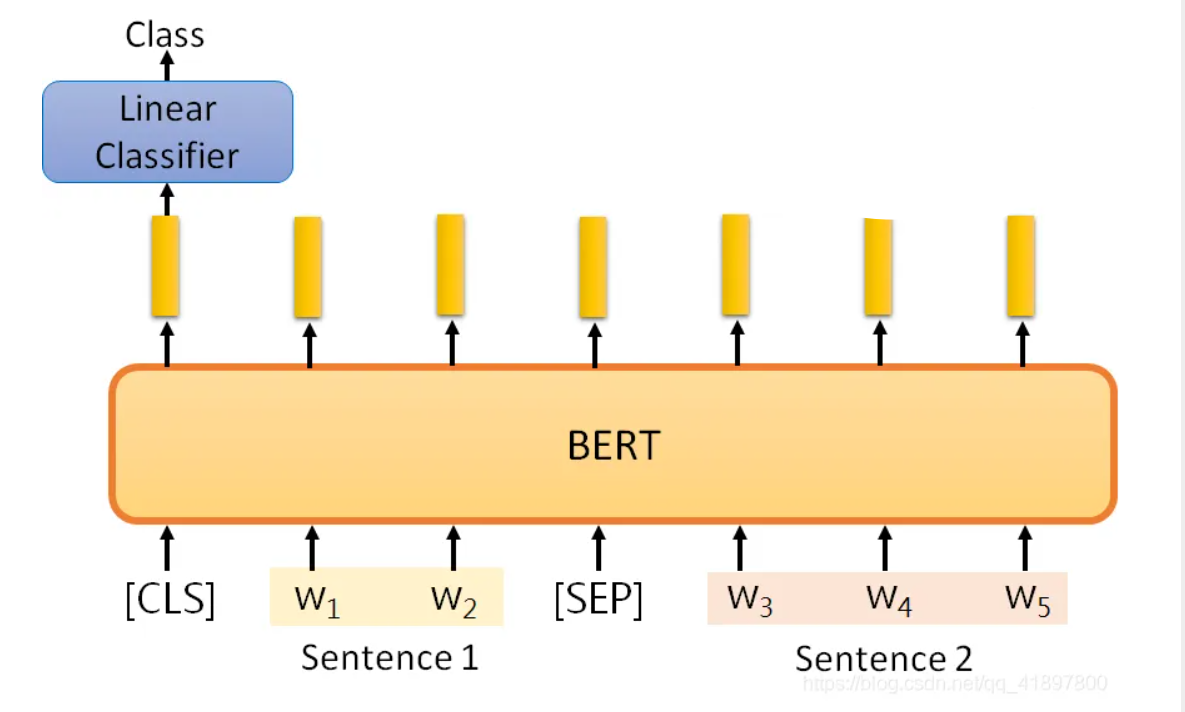

本模型的详情参考[这篇文章](https://zh-v2.d2l.ai/chapter_natural-language-processing-pretraining/bert.html)。

### BERT 实现情感分析

前提准备:

> 准备18多万条手机评论信息和对应的情感标签， 0, 1, 2 代表 差中好 评。

> 因为个人计算机资源无法训练出Bert预训练模型，我们使用 transformer 库中的 BertTokenizer、 BertModel模型。BertTokenizer将输入的评论语句转化为输入Bert模型的向量信息，BertModel根据输入信息输出结果。

#### 数据预处理并创建数据集

读取文件中的评论信息，并对数据进行去重。

In [181]:
import csv
import pandas as pd
import random
import torch
from transformers import BertTokenizer, BertModel
from torch import nn
from d2l import torch as d2l
from tqdm import tqdm

"""
读取评论文件的评论信息
"""
def read_file(file_name):
    
    comments_data = None
    
    # 读取评论信息
    with open(file_name, 'r', encoding='UTF-8') as f:
        reader = csv.reader(f)
        comments_data = [[line[0], int(line[1])] for line in reader]                      # 读取评论数据和对应的标签信息
    
    # 打乱数据集
    random.shuffle(comments_data)
    
    data = pd.DataFrame(comments_data)
    
    same_sentence_num = data.duplicated().sum()                                           # 统计重复的评论内容个数
    
    if same_sentence_num > 0:
        data = data.drop_duplicates()                                                     # 删除重复的样本信息
    
    
    f.close()
    
    return data


读取数据集信息，并输出样本的长度

In [182]:
comments_data = read_file('./file/comments.csv')
len(comments_data)

181945

查看所有样本信息

In [183]:
comments_data

,0,1
0,外形外观：时尚精美拍照效果：华为拍照效果杠杠的,2
1,本来我是想买苹果13，后来想了想还是支持下华为毕竟是国产之光，但拿到手机用起来感觉系统有时候...,1
2,手机毕竟是处理器流畅的很手机还比较轻薄还有微颜功能和功能第一感觉很棒流行一些大型游戏十分流畅...,2
3,京东送货非常快辛苦快递小哥啦手机看着挺好的选了黑色的毕竟年纪大了各种彩色已经不适合我了的屏幕...,2
4,外形外观在京东买手机好几台了这次是最差的手机像是二手的包装简陋一看就是拆封的装手机的盒子都布...,0
...,...,...
186528,手机赠品一起寄回去了也显示收货了到你们哪边就说我没退回赠品扣我赠品的钱一天两天就算了能理解慢...,0
186529,手机已经拿到了。使用感觉很棒！手机的颜值可以的。特别是屏幕，采用了3D曲屏设计，感觉很棒。总...,2
186530,从开始一直都是用苹果好用是好用就是电池真的不想说,1
186531,第一次在京东买手机手机刚收到包装很好完整手机颜色很漂亮手感不错才开始使用看看效果怎么样总体感...,2


以 6:4 的比例拆分训练集与测试集，设定切分线。

In [184]:
split = 0.6
split_line = int(len(comments_data) * split)
split_line

109167

划分训练集 train_comments, train_lables 与测试集 test_comments，test_lables 并输出它们的长度

In [198]:
# 划分训练集与测试集，并将pandas数据类型转化为列表类型
train_comments, train_labels = list(comments_data[: split_line][0]), list(comments_data[: split_line][1])
test_comments, test_labels = list(comments_data[split_line:][0]), list(comments_data[split_line:][1])

len(train_comments),len(train_labels), len(test_comments), len(test_labels)

(109167, 109167, 72778, 72778)

### 定义网络模型

现在我们来微调Bert，使用Bert来实现情感分析(文本分类)的效果。

默认这里使用基本模型Bert_base(bert-base-chinese)，使用12层Transformer编码器块，768个隐藏单元和12个自注意头。

只需要在Bert的输出信息中提取出**综合上下文信息 '\<cls\>'**，并外接一层全连接层，即可完成情感分析(文本分类)效果。如下图



> 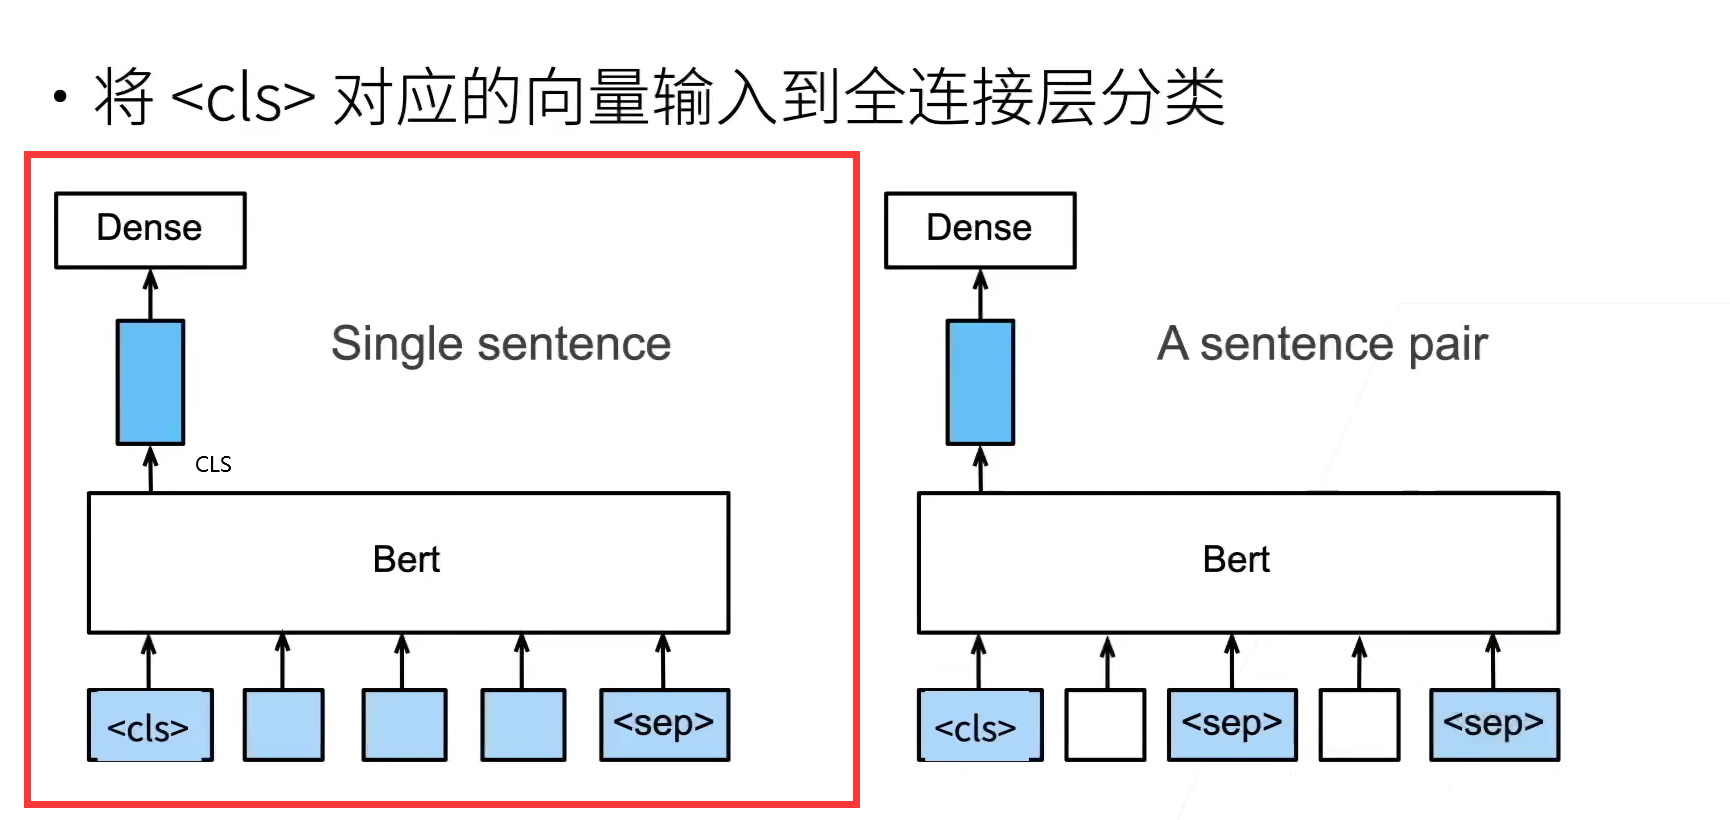

仍不太懂的小伙伴可以参考[transform_bert官方文档](https://huggingface.co/docs/transformers/main/en/model_doc/bert#transformers.BertModel)，对于Bert的参数和返回有详细说明。

In [194]:
"""
Step2: 定义BERTClassifier分类器模型
"""
class BERTClassifier(nn.Module):

    # 初始化加载 bert-base-chinese 原型，即Bert中的Bert-Base模型
    def __init__(self, output_dim, pretrained_name='bert-base-chinese'):

        super(BERTClassifier, self).__init__()
        
        # 定义 Bert 模型
        self.bert = BertModel.from_pretrained(pretrained_name)

        # 外接全连接层
        self.mlp = nn.Linear(768, output_dim)


    def forward(self, tokens_X):

        # 得到最后一层的 '<cls>' 信息， 其标志全部上下文信息
        res = self.bert(**tokens_X)

        # res[1]代表序列的上下文信息'<cls>'，外接全连接层，进行情感分析 
        return self.mlp(res[1])


### 定义训练函数与评估函数

设计以下的评估函数和训练函数，用以对模型进行训练测试

In [195]:
"""
评估函数，用以评估数据集在神经网络下的精确度
"""
def evaluate(net, comments_data, labels_data):
    
    sum_correct, i = 0, 0
    
    while i <= len(comments_data):
        
        comments = comments_data[i: min(i + 8, len(comments_data))]
        
        tokens_X = tokenizer(comments, padding=True, truncation=True, return_tensors='pt').to(device=device)

        res = net(tokens_X)                                          # 获得到预测结果

        y = torch.tensor(labels_data[i: min(i + 8, len(comments_data))]).reshape(-1).to(device=device)

        sum_correct += (res.argmax(axis=1) == y).sum()              # 累加预测正确的结果
        i += 8

    return sum_correct/len(comments_data)                           # 返回(总正确结果/所有样本)，精确率


"""
训练bert_classifier分类器

"""
def train_bert_classifier(net, tokenizer, loss, optimizer, train_comments, train_labels, test_comments, test_labels, device, epochs):
    
    max_acc = 0.5                                 # 初始化模型最大精度为0.5
    
    # 累计训练18万条数据 epochs 次，优化模型
    for epoch in tqdm(range(epochs)):
        
        i, sum_loss = 0, 0                           # 每次开始训练时， i 为0 表示从第一条数据开始训练
        
        # 计算训练集与测试集的精度
        train_acc = evaluate(net, train_comments, train_labels)
        test_acc = evaluate(net, test_comments, test_labels)
        
        # 输出精度
        print('\n--epoch', epoch, '\t--loss:', sum_loss / (len(train_comments) / 8), '\t--train_acc:', train_acc, '\t--test_acc', test_acc)
        
        
        
        # 如果测试集精度 大于 之前保存的最大精度，保存模型参数，并重设最大值
        if test_acc > max_acc:
            
            # 更新历史最大精确度
            max_acc = test_acc
            
            # 保存模型
            torch.save(net.state_dict(), 'bert.parameters')
        
        
        # 开始训练模型
        while i < len(comments_data):
            comments = train_comments[i: min(i+8, len(train_comments))]             # 批量训练，每次训练8条样本数据

            # 通过 tokenizer 数据化输入的评论语句信息，准备输入bert分类器
            # 输入的8个评论语句长度很可能不一致，这时取长度为最长的那个句子，padding=True代表对短句子进行填充操作
            # 当输入的某个句子过长时，使用truncation=True进行截断操作
            # return_tensors='pt' 代表返回的数据类型为 python 的 torch 类型
            tokens_X = tokenizer(comments, padding=True, truncation=True, return_tensors='pt').to(device=device)

            # 将数据输入到bert分类器模型中，获得结果
            res = net(tokens_X)

            # 批量获取实际结果信息
            y = torch.tensor(train_labels[i: min(i+8, len(train_comments))]).reshape(-1).to(device=device)

            optimizer.zero_grad()                  # 清空梯度
            l = loss(res, y)                       # 计算损失
            l.backward()                           # 后向传播
            optimizer.step()                      # 更新梯度

            sum_loss += l.detach()                # 累加损失
            i += 8                                # 样本下标累加


### 设置损失函数、优化方法、BertTokenizer词嵌入

本次实验中，我们这里使用**交叉熵损失函数、小批量随机梯度下降**，并定义 BertTokenizer 将输入的评论语句(次元序列)转化为输入Bert的数据。

In [191]:
device = d2l.try_gpu()                                  # 获取GPU

net = BERTClassifier(output_dim=3)                      # BERTClassifier分类器，因为最终结果为3分类，所以输出维度为3，代表概率分布
net = net.to(device)

# 定义tokenizer对象，用于将评论语句转化为BertModel的输入信息
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')

loss = nn.CrossEntropyLoss()                            # 损失函数
optimizer = torch.optim.SGD(net.parameters(), lr=1e-4)      # 小批量随机梯度下降算法


Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### 训练模型

In [200]:
train_bert_classifier(net, tokenizer, loss, optimizer, train_comments, train_labels, test_comments, test_labels, device, 20)